<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/EntropyInPhysicsAndInformationTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the notebook for the video [Entropy in physics and information theory - demystified](https://youtu.be/F9YkjKoT2lw)

### Toy model to illustrate the difference between entropy in Physics and Information theory


#### 0. We will start with functional definitions for the toy model *(we will come back to these)*

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:

def hypothetical_entropy(chamber):
    """Calculate the information theory entropy based on a hypothetical probability distribution."""
    total_particles = np.sum(chamber)
    max_particles_in_cell = np.max(chamber)

    # If any cell has all the particles, it's a highly surprising low-probability event
    if max_particles_in_cell == total_particles:
        probability = 0.01  # Assigning a low probability
    else:
        # If particles are dispersed, it's a less surprising high-probability event
        probability = 0.99  # Assigning a high probability
    print(f"Shannon entropy probabilities: {probability}")
    return -probability * np.log2(probability)

In [91]:
def gibbs_entropy(chamber):
    N = np.sum(chamber)
    probabilities = chamber.flatten() / N  # Probability of each cell
    print(f"Gibbs entropy probabilities: {probabilities}")
    non_zero_probs = probabilities[probabilities > 0]
    entropy = -np.sum(non_zero_probs * np.log(non_zero_probs))
    return entropy

In [92]:

# Function to visualize the chamber and entropy values
def visualize_chamber(chamber, title):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot chamber
    cax = ax[0].matshow(chamber, cmap='viridis')
    plt.colorbar(cax, ax=ax[0])
    ax[0].set_title("Chamber State")
    for i in range(chamber.shape[0]):
        for j in range(chamber.shape[1]):
            ax[0].text(j, i, str(int(chamber[i, j])), ha='center', va='center', color='w')

    # Plot entropy values
    physics_ent = gibbs_entropy(chamber)
    info_theory_ent = hypothetical_entropy(chamber)
    ax[1].bar(['Physics Entropy', 'Info Theory Entropy'], [physics_ent, info_theory_ent], color=['blue', 'green'])
    ax[1].set_title("Entropy Values")
    ax[1].set_ylim(0, max(physics_ent, info_theory_ent) + 0.5)
    ax[1].text(0, physics_ent + 0.1, f"{physics_ent:.2f}", ha='center', va='bottom')
    ax[1].text(1, info_theory_ent + 0.1, f"{info_theory_ent:.2f}", ha='center', va='bottom')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [93]:
def disperse(chamber):
    """Disperse gas particles in the chamber."""
    new_chamber = np.zeros((4, 4))
    for i in range(4):
        for j in range(4):
            valid_neighbors = [(di, dj) for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)] if 0 <= i+di < 4 and 0 <= j+dj < 4]
            total_divisions = len(valid_neighbors) + 1  # +1 for the original cell

            # Distribute to neighbors
            for di, dj in valid_neighbors:
                new_chamber[i+di, j+dj] += chamber[i, j] / total_divisions

            # Particles retained in the current cell
            new_chamber[i, j] += chamber[i, j] / total_divisions

    return new_chamber

#### 1. The initial state is a chamber with all gas molecules in the top right of the chamber

In [94]:
# Define the chamber and dispersion function
chamber = np.zeros((4, 4))
chamber[0, -1] = 100  # Initially, all gas particles are in the top-right square

####1a. Lets visualize the initial state and the entropy values

Gibbs entropy probabilities: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shannon entropy probabilities: 0.01


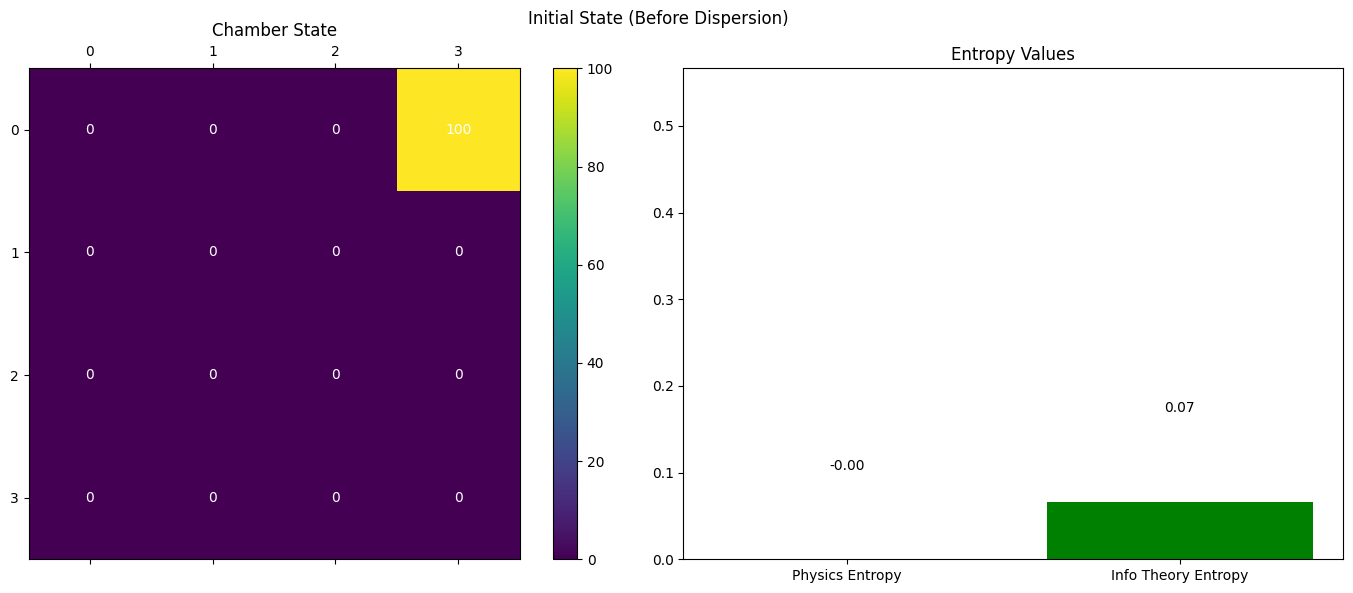

In [95]:
visualize_chamber(chamber, "Initial State (Before Dispersion)")

*In the initial state of the chamber "Physics entropy" is **less** than information theory of entropy*

#### 2. The final state is a chamber with the gas molecules have dispersed into the chamber



In [96]:
# Disperse the gas particles over multiple time steps
final_chamber = chamber.copy()
for _ in range(5):
    final_chamber = disperse(final_chamber)

#### 2a. Visualizing the dispersed state and the entropy values


Gibbs entropy probabilities: [0.03354167 0.07885494 0.14263683 0.13144547 0.02340741 0.06972685
 0.12860802 0.14263683 0.00877778 0.02605556 0.06972685 0.07885494
 0.         0.00877778 0.02340741 0.03354167]
Shannon entropy probabilities: 0.99


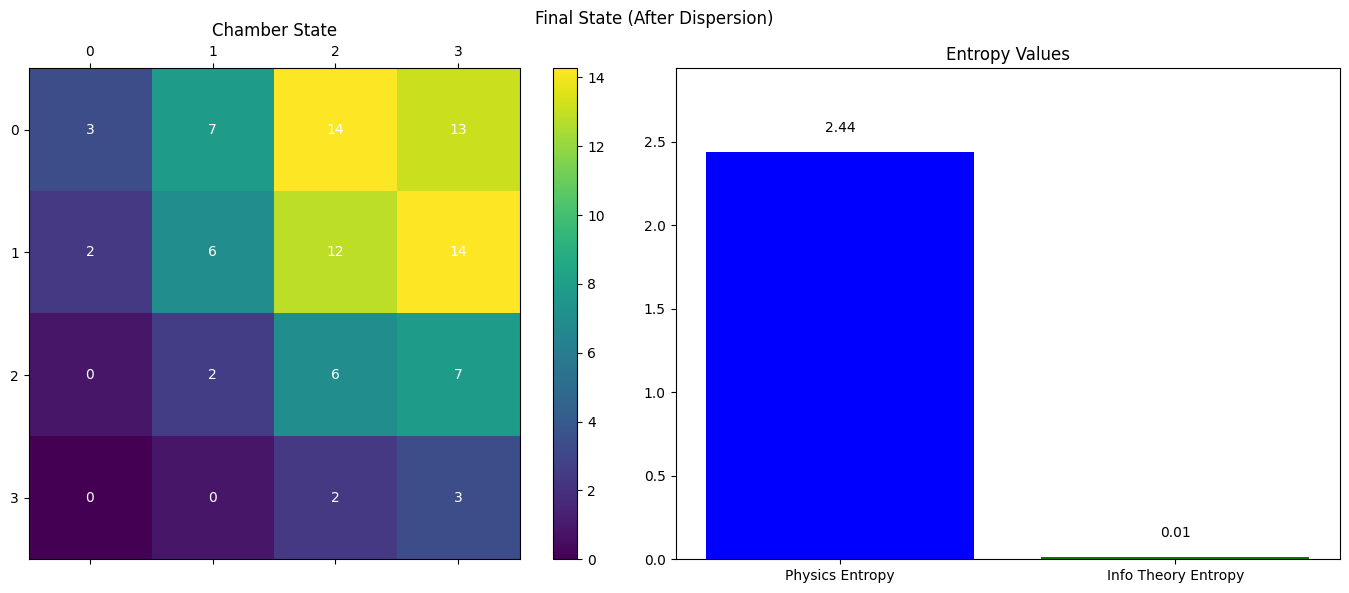

In [97]:
# Visualize the chambers and their entropy values

visualize_chamber(final_chamber, "Final State (After Dispersion)")


*In the final dispersed state of the chamber "Physics entropy" is **more** than information theory of entropy*

In the visualizations, the color represents the concentration of gas particles in each cell of the chamber.

Darker cells (closer to black) have fewer gas particles. Lighter cells (closer to white) have more gas particles. In the initial state, all the gas particles are concentrated in one cell, so it is the lightest, while all other cells are black. In the final state, the gas particles have dispersed, so the colors are more evenly distributed, reflecting that the gas particles are more evenly distributed throughout the chamber.

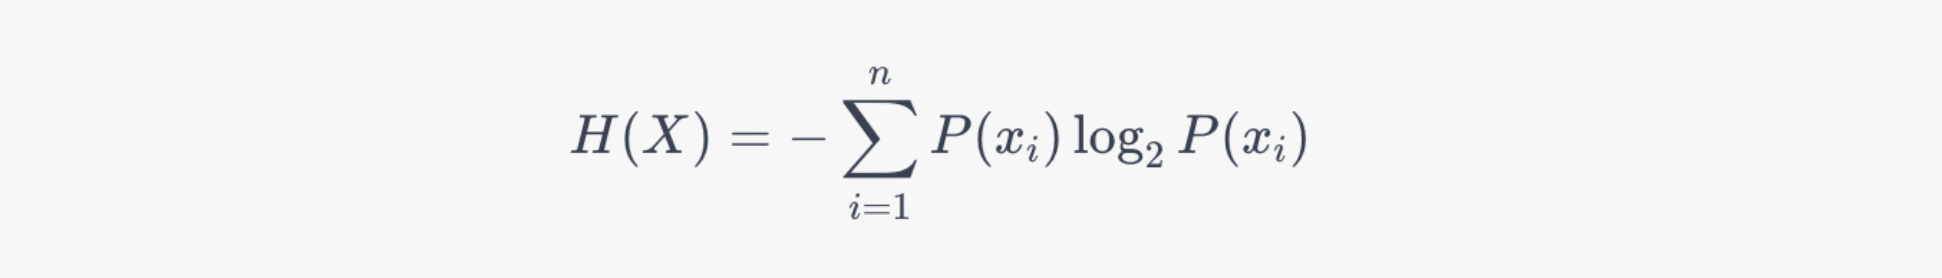